In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CityScope Spatial Urban Analysis

## Install Libraries

In order to use pandana package, need to upgrade numpy

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy

In [253]:
data_path = '/content/drive/MyDrive/3.Project/6.ARC-MIT/Simulation/data'

^^ Restart the runtime if suggested

In [ ]:
!pip install osmnet
!pip install pandana
!pip install cs-brix
!pip install folium
!pip install matplotlib==3.1.3

In [3]:
# CityScope Brix
import brix

# Data analysis
import geopandas as gpd
import pandas as pd
import numpy as np

# Visualisations
import folium
import matplotlib.pyplot as plt

# osm and pandana
import osmnet
import pandana

### Initialise the brix handler for our CityScope table and plot the GEOGRIDDATA

In [268]:
import pandas as pd
import pandana as pdna
import matplotlib
from matplotlib import pyplot as plt


In [282]:
wards = gpd.read_file(data_path + '/Ward_Population.shp')
wards = wards[wards['Dist_Name'] == 'District 4']
all_pois = {'medical' : gpd.read_file(data_path + '/POI/Merdical.shp'),
        'park' : gpd.read_file(data_path + '/POI/GreeneryPark.shp'),
        'education' : gpd.read_file(data_path + '/POI/Education.shp'),
        'commercial' : gpd.read_file(data_path + '/POI/Commercial_Services.shp')}
amenities = ['medical', 'park', 'education', 'commercial']
ward_pops = np.array([pop for pop in wards['Pop_2021']])

array([ 6034., 11572., 15141., 15033., 10523., 12769., 10625.,  5004.,
       10612., 12327., 14773., 20014.,  9734.,  9435., 10602.])

In [283]:
def compute_closest_distance(centroids, pois):
  distances = []
  for j in centroids:
    distances.append(np.min([j.distance(x) for x in pois['geometry']]))
  return distances

def compute_accessibility(centroids, pois, max_dist=1000):
  accessibility = []
  circles = centroids.buffer(max_dist)
  for j in circles:
    accessibility.append(np.sum([j.contains(x) for x in pois['geometry']]))
  return accessibility

In [284]:
W_accesstoSM = {}
Acessibilities = {}
for amenity in amenities:
  pois = all_pois[amenity]
  dists = compute_closest_distance(wards.centroid, pois)
  W_accesstoSM[amenity] = 1.0/(ward_pops * distances)
  #accesstoSM_norm = w_acesstoSM / np.max(w_acesstoSM)
  Acessibilities[amenity] = compute_accessibility(wards.centroid, pois)

# Visualize Medical Proximity and Accessibility

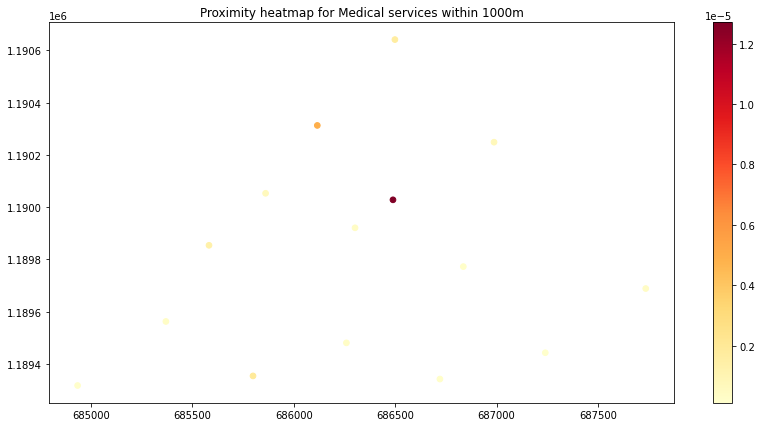

In [297]:
amenity = 'education'
fig, ax = plt.subplots(figsize=(14,7))

plt.title('Proximity heatmap for Medical services within 1000m')
plt.scatter(wards.centroid.geometry.x, wards.centroid.geometry.y, 
            c=W_accesstoSM[amenity], s=32, cmap='YlOrRd', 
            )
cb = plt.colorbar()

plt.show()

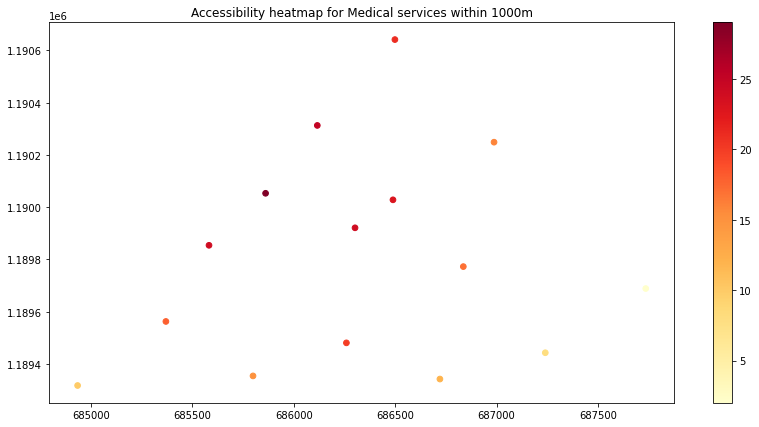

In [299]:
amenity = 'medical'
fig, ax = plt.subplots(figsize=(14,7))
plt.title('Accessibility heatmap for Medical services within 1000m')
plt.scatter(wards.centroid.geometry.x, wards.centroid.geometry.y, 
            c=Acessibilities[amenity], s=32, cmap='YlOrRd')

cb = plt.colorbar()
plt.show()